In [1]:
from autoencoder import AutoEncoder, VariationalAutoEncoder, RMS
import resources
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Load in RMS data for tests

In [2]:
exps = ['Test 5', 'Test 7', 'Test 8', 'Test 9']
rms = {}

for test in exps:
    rms[test] = RMS(test)
    
try:
    rms['Test 5'].data.drop(['23', '24'], axis=1, inplace=True)
except KeyError:
    pass


Loaded Test 5 RMS Data

Loaded Test 7 RMS Data

Loaded Test 8 RMS Data

Loaded Test 9 RMS Data


# Setup Variational Autoencoder for each Test
- The model is trained over a small section of the test depending on `train_slice`.
- The model parameters are specified within the `params` dict.

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf

In [15]:

vae = {}
for test in exps:
        vae[test] = VariationalAutoEncoder(rms[test],
                                           tb=False,
                                           tb_logdir=rms[test].exp_name,
                                           train_slice=(0, 50),
                                           random_state=1,
                                           params={'latent_dim': 2,
                                                   'n_size': [64, 64],
                                                   'epochs': 300,
                                                   'batch_size': 10,
                                                   'callbacks': [
                                                           tf.keras.callbacks.EarlyStopping(
                                                                monitor='val_loss',
                                                                patience=30,
                                                                mode='min',
                                                                start_from_epoch=100,
                                                           ),
                                                        ]
                                                   }
                                           )

Pre-Processing Data:
	Training Data: slice(0, 50, None)
	Input train shape: (45, 407)
	Input val shape: (5, 407)

VAE-TEST_5-E-300-L-[64, 64, 'Z', 64, 64]-T-20230503-165151

Pre-Processing Data:
	Training Data: slice(0, 50, None)
	Input train shape: (45, 410)
	Input val shape: (5, 410)

VAE-TEST_7-E-300-L-[64, 64, 'Z', 64, 64]-T-20230503-165152

Pre-Processing Data:
	Training Data: slice(0, 50, None)
	Input train shape: (45, 393)
	Input val shape: (5, 393)

VAE-TEST_8-E-300-L-[64, 64, 'Z', 64, 64]-T-20230503-165152

Pre-Processing Data:
	Training Data: slice(0, 50, None)
	Input train shape: (45, 394)
	Input val shape: (5, 394)

VAE-TEST_9-E-300-L-[64, 64, 'Z', 64, 64]-T-20230503-165152



# Train each VAE on the training data
- `x` is the inputted data for training, which is `vae.train_data`
- `val_data` is the validation data from `vae.val_data`

In [16]:
for test in exps:
        vae[test].fit(x=vae[test].train_data,
                      val_data=vae[test].val_data,
                      verbose=0,
                      use_multiprocessing=True,
                      )

Training:   0%|           0/300 ETA: ?s,  ?epochs/s

Training:   0%|           0/300 ETA: ?s,  ?epochs/s

Training:   0%|           0/300 ETA: ?s,  ?epochs/s

Training:   0%|           0/300 ETA: ?s,  ?epochs/s

# Results Visualisation

## Loss plot of each trained model

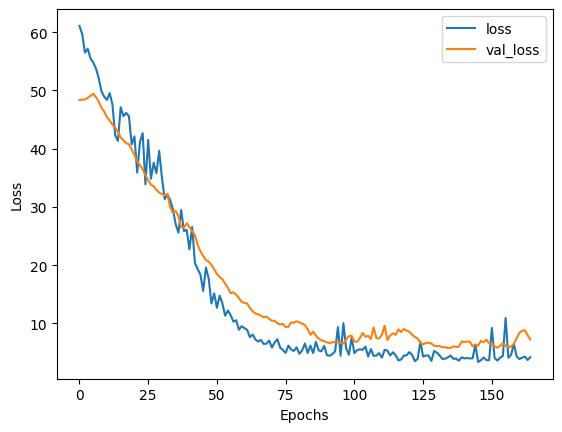

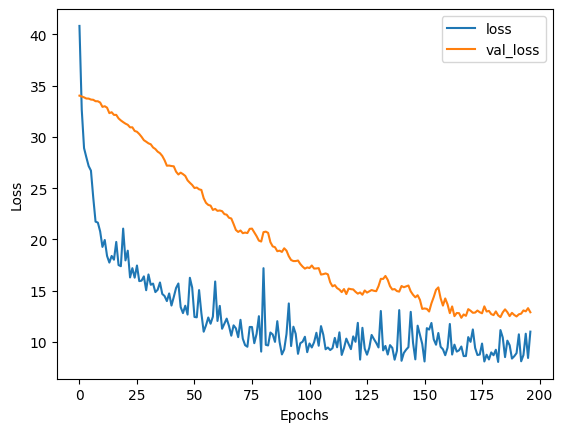

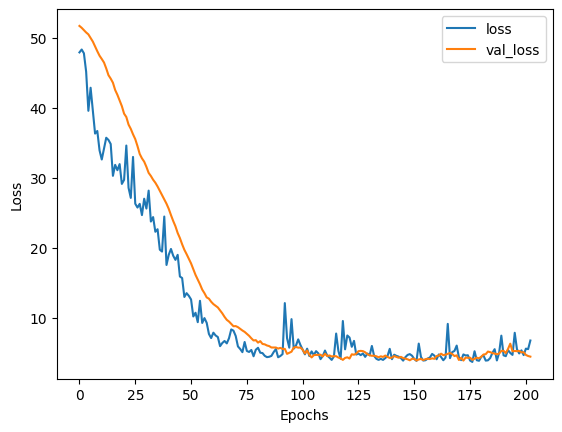

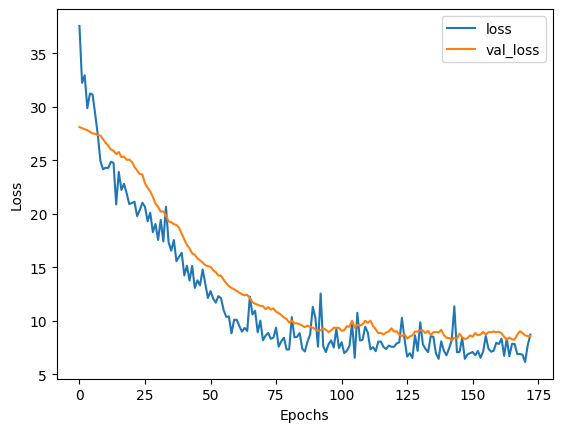

In [17]:
for test in exps:
    vae[test].loss_plot()

## Score each model
- Models scored on train, validation and whole dataset

In [7]:
for test in exps:
    print(f'\n {test}')
    pred_tr, scores_tr = vae[test].score('train')
    pred_val, scores_val = vae[test].score('val')
    pred_data, scores_data = vae[test].score('dataset')


 Test 5

Train Scores:
	MAE: 0.06794
	MSE: 0.01248
	R2: -0.18302

Val Scores:
	MAE: 0.06998
	MSE: 0.01374
	R2: 0.40716

Dataset Scores:
	MAE: 0.16637
	MSE: 0.10851
	R2: -0.21666

 Test 7

Train Scores:
	MAE: 0.10336
	MSE: 0.01746
	R2: 0.59045

Val Scores:
	MAE: 0.12109
	MSE: 0.02658
	R2: 0.46834

Dataset Scores:
	MAE: 0.17513
	MSE: 0.06038
	R2: 0.23071

 Test 8

Train Scores:
	MAE: 0.07327
	MSE: 0.00968
	R2: 0.32423

Val Scores:
	MAE: 0.06734
	MSE: 0.00862
	R2: 0.39242

Dataset Scores:
	MAE: 0.28471
	MSE: 0.19031
	R2: -1.61025

 Test 9

Train Scores:
	MAE: 0.08738
	MSE: 0.01295
	R2: 0.48207

Val Scores:
	MAE: 0.10467
	MSE: 0.01758
	R2: 0.20498

Dataset Scores:
	MAE: 0.18193
	MSE: 0.08040
	R2: -0.07625


## Show histogram of scores across whole dataset

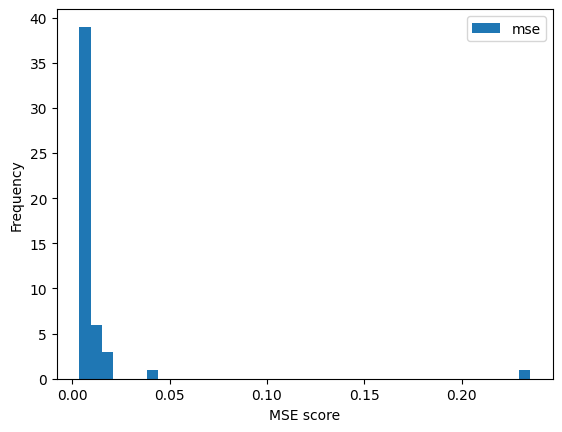

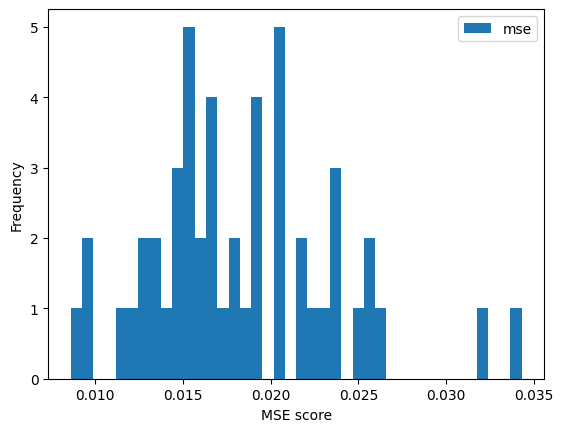

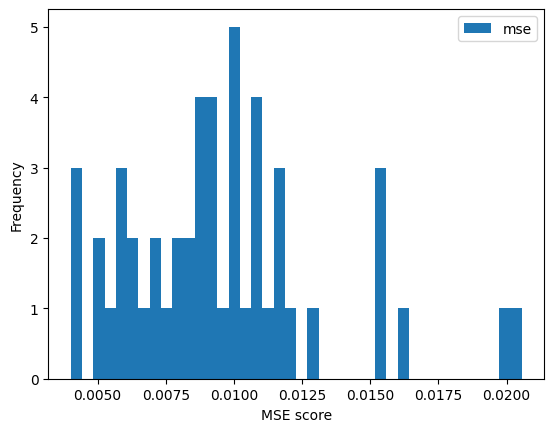

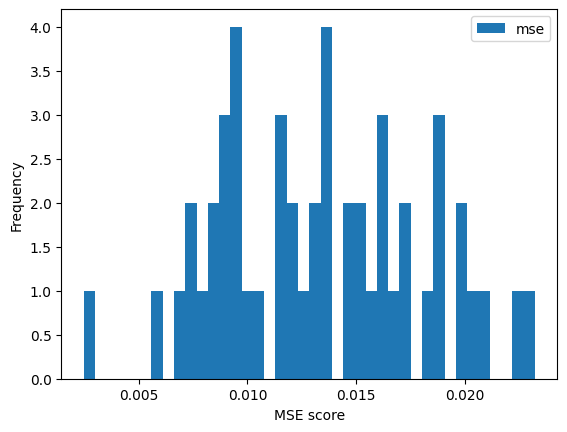

In [8]:
for test in exps:
    fig, ax = vae[test].hist_scores(['mse'])

## Show model recreation capability of training and validation sets

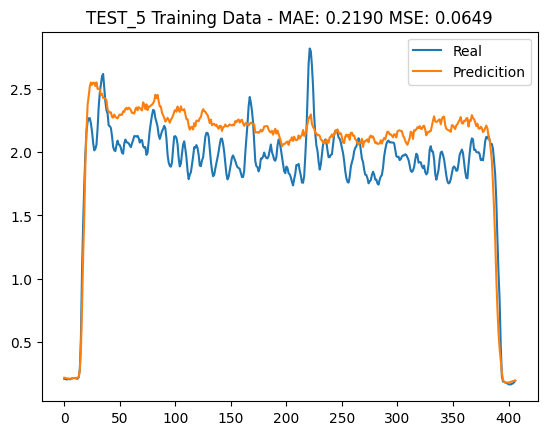

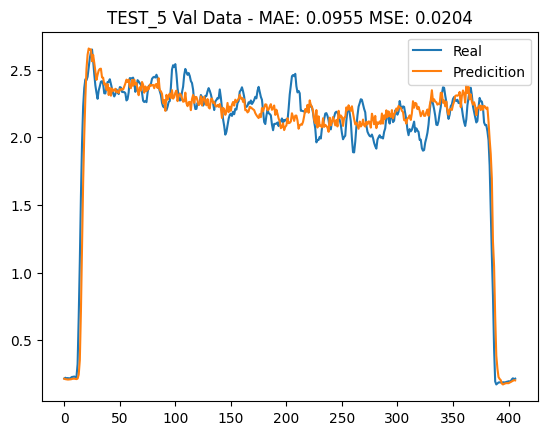

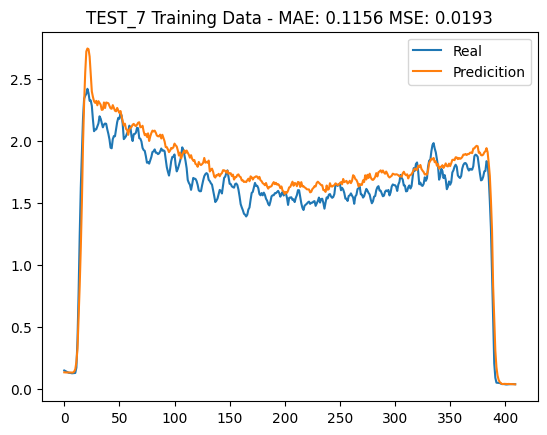

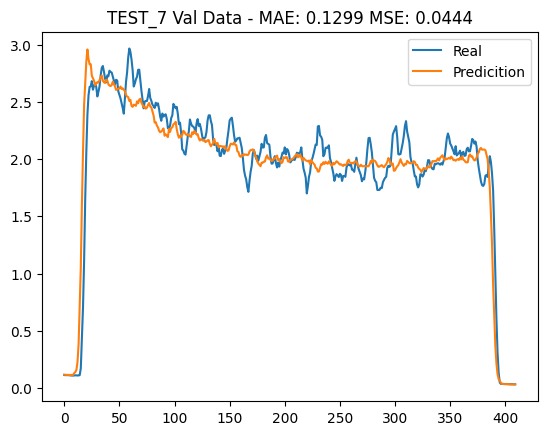

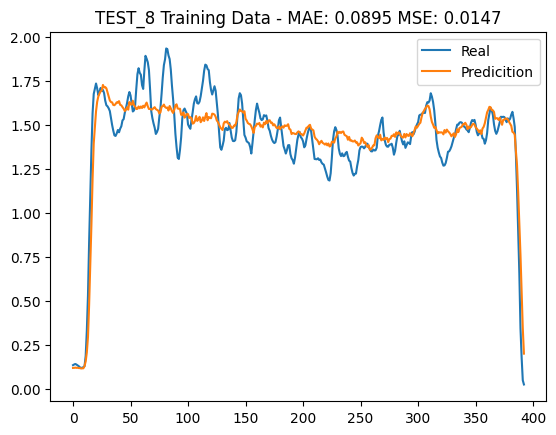

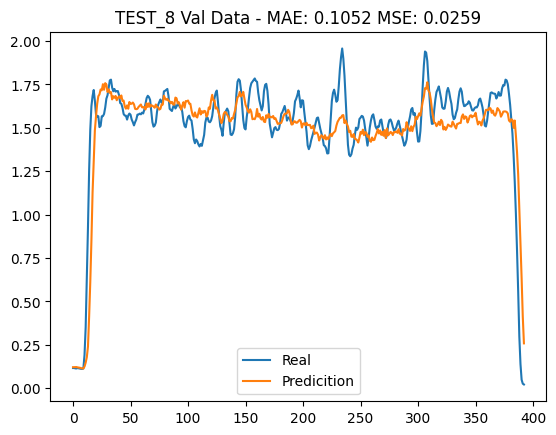

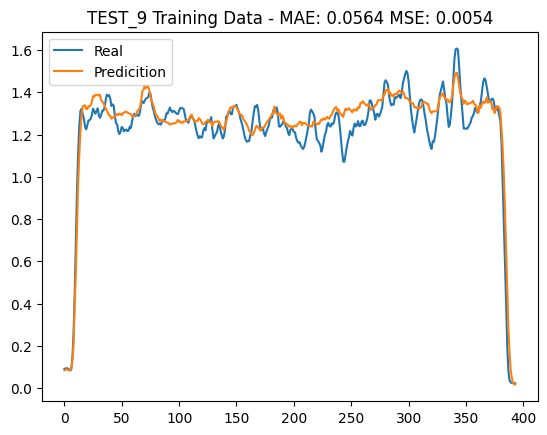

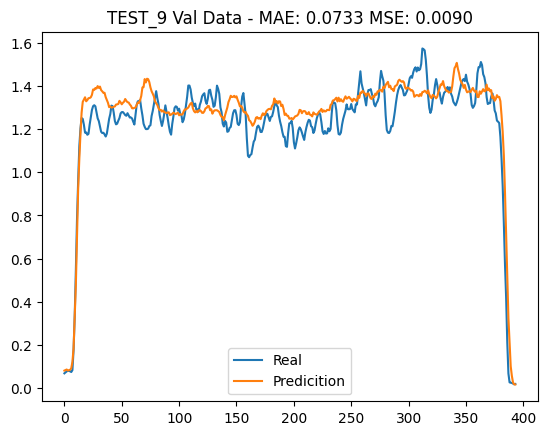

In [9]:
for test in exps:
    fig, ax = vae[test].pred_plot(vae[test]._ind_tr[0])
    ax.set_title(f'{vae[test].RMS.exp_name} Training Data - {ax.get_title()}')
    fig, ax = vae[test].pred_plot(vae[test]._ind_val[0])
    ax.set_title(f'{vae[test].RMS.exp_name} Val Data - {ax.get_title()}')

## Thresholds for anomaly detection of each model

In [10]:
for test in exps:
    vae[test].thres


Cutoffs:
	MAE cutoff: 0.12883
	MSE cutoff: 0.04492
	R2 cutoff: -5.46725

Cutoffs:
	MAE cutoff: 0.11985
	MSE cutoff: 0.02366
	R2 cutoff: 0.44768

Cutoffs:
	MAE cutoff: 0.08799
	MSE cutoff: 0.01321
	R2 cutoff: 0.07617

Cutoffs:
	MAE cutoff: 0.10512
	MSE cutoff: 0.01808
	R2 cutoff: 0.25734


## Show scores against threshold


Cutoffs:
	MAE cutoff: 0.10612
	MSE cutoff: 0.02514
	R2 cutoff: -0.92624

Cutoffs:
	MAE cutoff: 0.12843
	MSE cutoff: 0.02682
	R2 cutoff: 0.39332

Cutoffs:
	MAE cutoff: 0.08799
	MSE cutoff: 0.01304
	R2 cutoff: 0.15808

Cutoffs:
	MAE cutoff: 0.11093
	MSE cutoff: 0.02049
	R2 cutoff: 0.14998


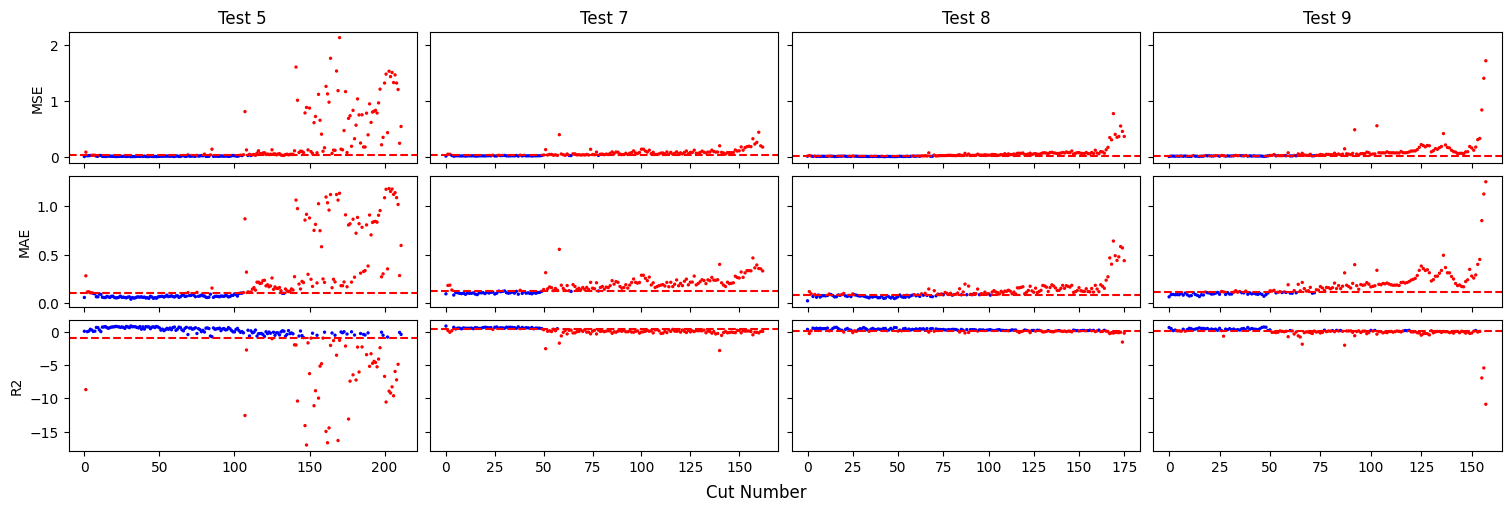

In [18]:
metrics = ['mse', 'mae', 'r2']

fig, ax = plt.subplots(len(metrics), len(exps),
                       figsize=(15, 5),
                       constrained_layout=True,
                       sharey= 'row',
                       sharex='col',
                       )

for i, test in enumerate(exps):
    ax[0, i].set_title(test)    
    for j, met in enumerate(metrics):
        _ = vae[test].scatter_scores([met], plt_ax=ax[j, i])

        ax[j, i].set_ylabel('')
        ax[j, i].set_xlabel('')
        ax[j, 0].set_ylabel(f'{met.upper()}')
_ = fig.supxlabel('Cut Number')

## VAE models latent space

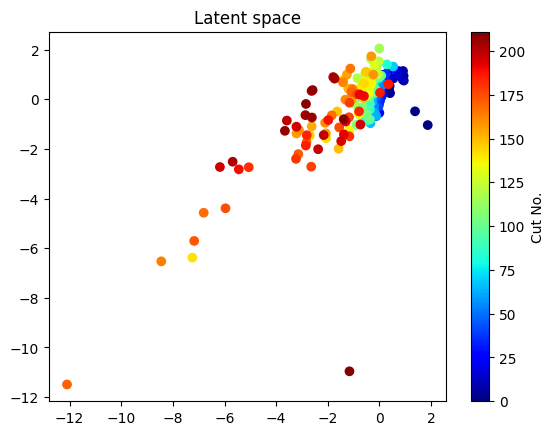

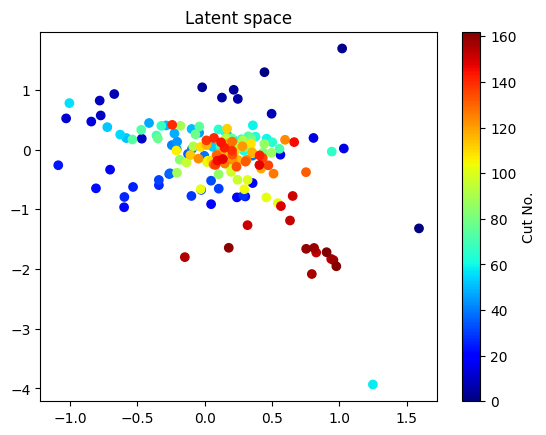

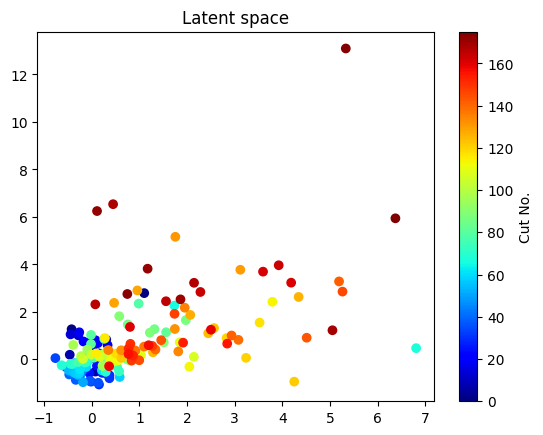

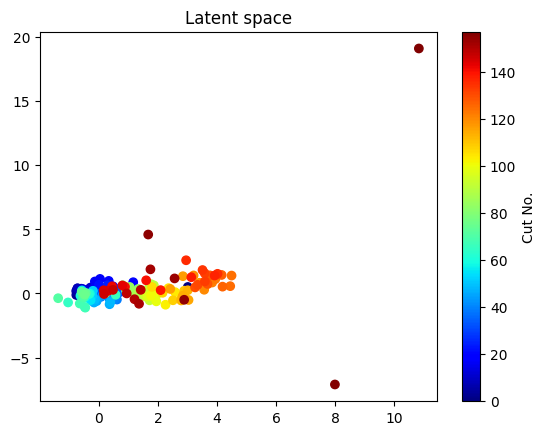

In [12]:
for test in exps:
    fig, ax = vae[test].plot_latent_space()

## Wear measurements comparison

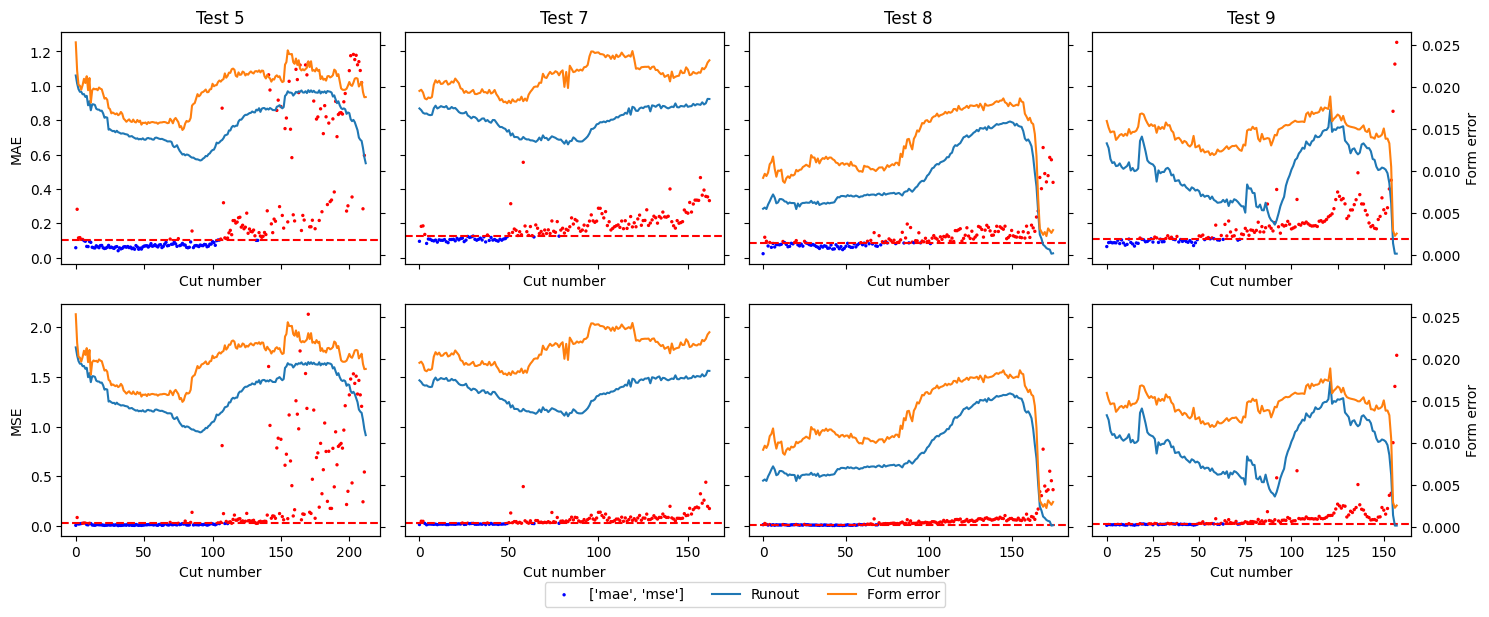

In [19]:
features = ['Runout', 'Form error']
metric = ['mae', 'mse']


fig, ax = plt.subplots(len(metric), len(exps),
                       figsize=(15, 6),
                       constrained_layout=True,
                       sharey= 'row',
                       sharex='col',
                       )

ax2 = []
for a in ax.ravel():
    ax2.append(a.twinx())

for a, b in zip(ax2[1:], ax2[0:-1]):
    a.sharey(b)

ax2 = np.reshape(ax2, ax.shape)

for i, test in enumerate(exps):
    ax[0, i].set_title(test)
    exp = resources.load(test)
    for j, met in enumerate(metric):
        _ = vae[test].scatter_scores([met], plt_ax=ax[j, i])

        for feature in features:
            feat = exp.features[feature]
            ax2[j, i].plot(range(len(feat)), feat, label=feature)

        ax[j, i].set_ylabel('')
        ax[j, 0].set_ylabel(f'{met.upper()}')
        ax2[j, -1].set_ylabel(f'{feature}')

for i, a in enumerate(ax2.ravel()):
    if (i + 1) % len(exps) != 0:
        plt.setp(a.get_yticklabels(), visible=False)

l1, lab1 = ax.ravel()[0].get_legend_handles_labels()
l2, lab2 = ax2.ravel()[0].get_legend_handles_labels()

plt.figlegend(l1 + l2,
              [metric] + lab2, 
              loc='center', 
              bbox_to_anchor=(0.5, 0),
              ncol=len(l1 + l2)
              )
plt.tight_layout()